https://www.kaggle.com/c/avazu-ctr-prediction/overview


<b>Input Data</b>
* train.csv     ≈40.4M
* test.csv      ≈4.58M

<b>Output(Expected Value)</b>
* id
* probability of click

<b>Features</b>
* id: ad identifier
* click: 0/1 for non-click/click
* hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
* C1 -- anonymized categorical variable
* banner_pos
* site_id
* site_domain
* site_category
* app_id
* app_domain
* app_category
* device_id
* device_ip
* device_model
* device_type
* device_conn_type
* C14-C21 -- anonymized categorical variablesid: ad identifier

https://github.com/diogojapinto/ctr-prediction/blob/master/Click-Through%20Rate%20Prediction.ipynb

<h1>Data前処理</h1>



In [107]:
import numpy as np
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame
%matplotlib inline
matplotlib.style.use('ggplot')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
2.1.1
0.23.4


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import random
import pickle

# just for test.data
## raw data (for read)
fp_train_test  = "./avazu-ctr-prediction/train.csv"
fp_col_counts_test = "./avazu-ctr-prediction/just_for_test/col_counts_test"
fp_train_test_f  = "./avazu-ctr-prediction/just_for_test/train_test_f.csv"



In [76]:
data_types = {
    'id': np.str,
    'click': np.bool_,
    'hour': np.str,
    'C1': np.uint16,
    'banner_pos': np.uint16,
    'site_id': np.object,
    'site_domain': np.object,
    'site_category': np.object,
    'app_id': np.object,
    'app_domain': np.object,
    'app_category': np.object,
    'device_id': np.object,
    'device_ip': np.object,
    'device_model': np.object,
    'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16,
    'C15': np.uint16,
    'C16': np.uint16,
    'C17': np.uint16,
    'C18': np.uint16,
    'C19': np.uint16,
    'C20': np.uint16,
    'C21': np.uint16    
}

In [ ]:
%%time

## data reading
date_parser = lambda x: pd.datetime.strptime(x, '%y%m%d%H')

df_train_test_org  = pd.read_csv(fp_train_test,  
                           dtype=data_types,
                           parse_dates=['hour'],
                           date_parser=date_parser)

In [ ]:
df_train_test_org.head()

In [ ]:
df_train_test_org.info()

In [ ]:
%%time
## 1.init_dict
cols_counts = {}  
for col in data_types.keys():
    cols_counts[col] = df_train_test_org[col].value_counts()

for k, v in cols_counts.items():
    print("{} : {}".format(k, v.size))
    
pickle.dump(cols_counts, open(fp_col_counts_test, 'wb'))

<b>Exploratory Data Analysis and Feature Engineering</b>

■ID　　⇒featureにならない

In [101]:
%%time
df_train_test_org.shape[0] == df_train_test_org['id'].unique().shape[0]

True

■click ⇒target value

False    0.835926
True     0.164074
Name: click, dtype: float64

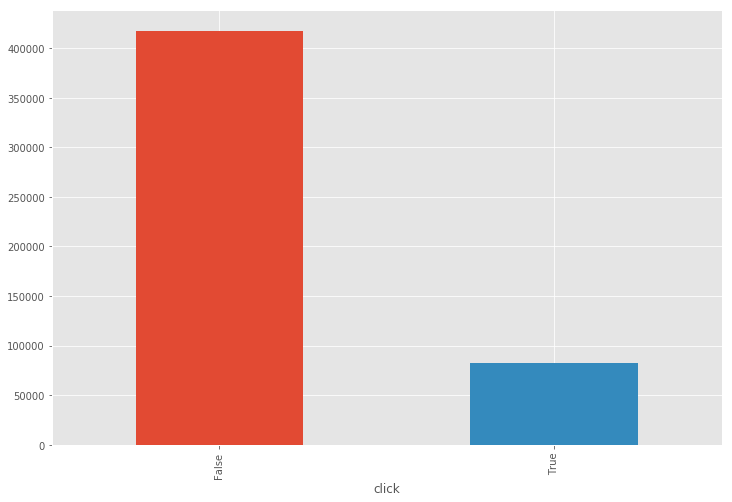

In [110]:
%%time
df_train_test_org.groupby('click').size().plot(kind='bar')
df_train_test_org['click'].value_counts() / df_train_test_org.shape[0]

■hour

In [112]:
df_train_test_org.hour.describe()

count                  500000
unique                      4
top       2014-10-21 02:00:00
freq                   207471
first     2014-10-21 00:00:00
last      2014-10-21 03:00:00
Name: hour, dtype: object

In [120]:
def derive_time_features(df, start_hour=None, remove_original_feature=False):
    if start_hour is None:
        start_hour = df['hour'][0]
        
    df['hour_int'] = df_train_test_org['hour'].apply(lambda x: np.floor((x - start_hour) / np.timedelta64(1, 'h')).astype(np.uint16))
    df['day_week'] = df_train_test_org['hour'].apply(lambda x: x.dayofweek)
    df['hour_day'] = df_train_test_org['hour'].apply(lambda x: x.hour)
    
    if remove_original_feature:
        df.drop('hour', axis=1, inplace=True)
    
    return df, start_hour

In [122]:
%%time
df_train_test_org, _ = derive_time_features(df_train_test_org)
df_train_test_org.head()

Wall time: 19.8 s


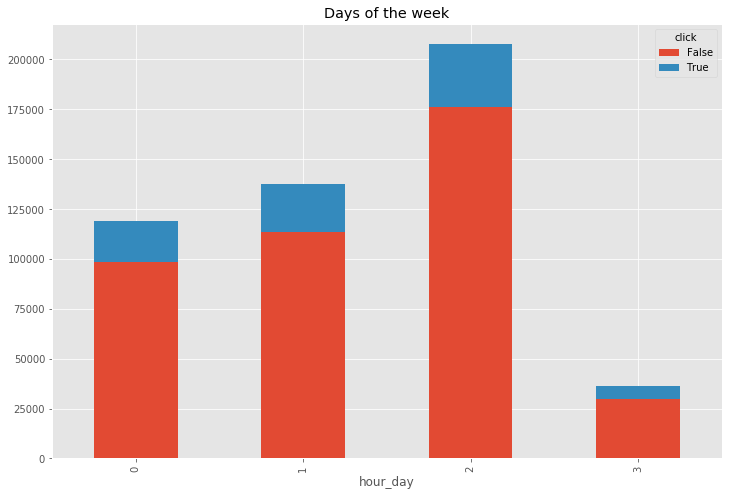

In [124]:
df_train_test_org.groupby(['hour_day', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Days of the week")

In [ ]:
train_df.groupby(['day_week', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Days of the week")